<a href="https://colab.research.google.com/github/Janko-dev/ktai_ids/blob/main/RF_label_after_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KTAI - Project
Jan Baljan

Brian Baert

##Loading the dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive/")
#Google colab first has to mount the google drive where the data is located

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/UNSWNB15/UNSW_NB15_training-set.csv') 
#make an in-memory pandas dataframe of the training dataset
test = pd.read_csv('/content/drive/MyDrive/UNSWNB15/UNSW_NB15_testing-set.csv')
#make an in-memory pandas dataframe of the test dataset
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


##Preprocessing the dataset

In [4]:
# The same preprocessing needs to be done on both the training and test dataset
# We can base our work on https://www.kaggle.com/code/imranjamal/network-intrusion-detection-system-using-ml-2/notebook

In [4]:
# first step is merging both datasets, so we do not need to do the same preprocessing twice
data = pd.concat([train, test]).reset_index(drop=True) # the index needs to be resetted in order for the numbering to be correct
cols_cat = data.select_dtypes('object').columns # save the categorical (non-numeric) columns
cols_numeric = data._get_numeric_data().columns # save the numberical columns

In [6]:
data.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


##Exploratory data analysis

In [7]:
# descriptive statistics
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
# The first step would be checking for missing values, but there are no missing values here, so we can omit this step
# However, there are some numerical features where the values have very high values, it is wise to use standardisation on these
# in Python we can use the StandardScaler object. 
# columns worth standardizing are all numerical columns

In [5]:
# what attack categories are there in the data? 
attack_types = data.attack_cat.unique()
print(attack_types.tolist())

['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits', 'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']


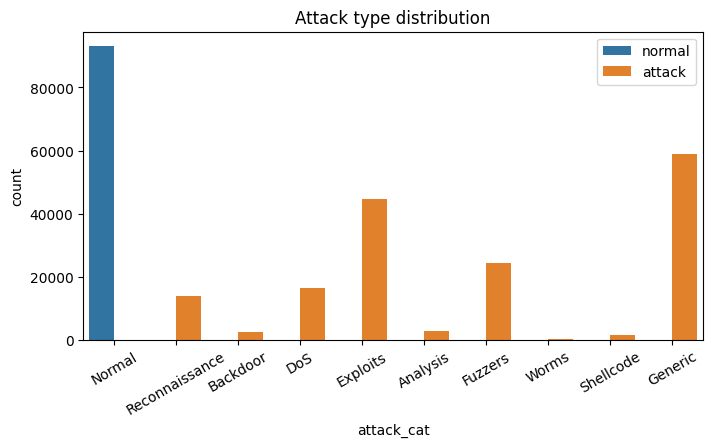

In [136]:
# Let's investigate the amount of attack types in the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='attack_cat', hue='label', data=data)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Attack type distribution")
plt.xticks(rotation=30)
plt.show()

In [137]:
# what service types are there in the data?
service_types = data.service.unique()
print(service_types.tolist())

['None', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp', 'ssl', 'dhcp', 'irc', 'radius', 'ssh']


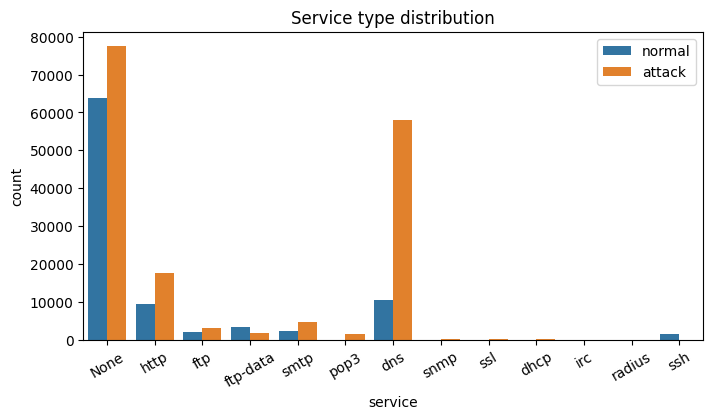

In [138]:
# Let's investigate the service type:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='service', hue='label', data=data)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Service type distribution")
plt.xticks(rotation=30)
plt.show()

In [6]:
# in the above it is clear that the 'empty' service type is filled with a '-', it is better and more convenient to use 'None'
data.service = np.where(data.service == '-', 'None', data.service)
service_types = data.service.unique()
print(service_types.tolist())

['None', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp', 'ssl', 'dhcp', 'irc', 'radius', 'ssh']


In [7]:
# remove the categorical columns (without any one-hot encoding or whatever)
data_cleaned = data.drop(cols_cat, axis=1)

## ML Models

In [15]:
# what models will we create? 
# will we do a grid search to find the best hyperparameter combination? 

In [8]:
# first step --> create a train and test subset, then divide the train subset in a train and validation set 
from sklearn.model_selection import train_test_split
# (validation set is used to train the hyperparameters of the model)
X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop('label', axis=1), data_cleaned['label'], test_size=0.20, random_state=37)
# inliterature they propose to do a validation split as well, but for now, this is not used here
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=47)

In [9]:
# standardisation of the numerical columns needs to happen AFTER the splitting in a train and test dataset
# according to online sources https://medium.com/analytics-vidhya/why-it-makes-a-difference-how-to-standardize-training-and-test-set-e95bf350bed3
# it is recommended to use the standard scaler from the training data to standardize the test dataset
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler()

scaled_X_train = train_scaler.fit_transform(X_train)
scaled_X_test = train_scaler.transform(X_test)

In [10]:
# starting of with a very simple RandomForest classifier, no cross_validation or anything on all numerical columns
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=4, random_state=41)
# n_estimators = the amount of classification trees used in the forest
# criterion = splitting criterion used (standard = Gini, but I prefer entropy)
# max_depth = the maximum depth of the trees
# random_state = randomizer

clf.fit(scaled_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=41)

In [11]:
clf.score(scaled_X_train, y_train)

0.904772531022907

In [32]:
# make predictions on the test set, save the ground truth as y_true
y_pred = clf.predict(scaled_X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
print("\nTest confusion matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g') # fmt='g' to disable scientific notation
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
print(cf_matrix)

In [12]:
from sklearn.model_selection import GridSearchCV
from time import time
# Random search
#--------------
# record the starting time

start = time()

# creating a grid of parameters
param_grid = {
  'n_estimators': [5, 10, 15, 20],
  'min_samples_leaf': [5, 10, 15],
  'max_depth': [6, 8, 10, 12, 14],
  'criterion': ['gini', 'entropy']
}

In [15]:
# instantiate the grid search cross validation
rf_gs = GridSearchCV(
  estimator=clf,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  refit=True,
  return_train_score=True, 
  verbose=5
)

In [156]:
# Record the current time 
start = time()
# Fit the selected model
rf_gs.fit(scaled_X_train, y_train)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(rf_gs.cv_results_['params'])))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=5;, score=(train=0.979, test=0.979) total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=5;, score=(train=0.990, test=0.990) total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=5;, score=(train=0.979, test=0.980) total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=5;, score=(train=0.977, test=0.976) total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=5;, score=(train=0.983, test=0.983) total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=10;, score=(train=0.983, test=0.983) total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=5, n_estimators=10;, score=(train=0.991, test=0.990) total time=   1.8s
[CV 3/5] END criterion=gi

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.metrics import matthews_corrcoef
import pickle

In [ ]:
y_pred_grid_bestModel = rf_gs.best_estimator_.predict(scaled_X_test)
print("The model with parameters: ", rf_gs.best_estimator_, " \ngives the following accuracy: ", accuracy_score(y_test, y_pred_grid_bestModel))
accuracy_grid = accuracy_score(y_test, y_pred_grid_bestModel)
print(accuracy_grid)

In [166]:
# making a dumpfile where the model parameters are being saved
# this is usually done with pickle, hence the .pkl extension
pickle.dump(rf_gs.best_estimator_, open('/content/drive/MyDrive/UNSWNB15/RF_model_std.pkl', 'wb'))

In [162]:
rf_gs.best_estimator_.criterion

'gini'

In [ ]:
# see: https://towardsdatascience.com/hyperparameter-tuning-with-grid-search-and-random-search-6e1b5e175144#:~:text=The%20key%20difference%20from%20grid,sample%2050%20values%20to%20test.

In [37]:
cols_numeric_without_label = cols_numeric.drop('label')
label_values = data.label.unique()

In [ ]:
# loading in the saved model
loaded_model = pickle.load(open('/content/drive/MyDrive/UNSWNB15/RF_model_std.pkl', 'rb')) #the original model = RF_model.pkl
result = loaded_model.score(scaled_X_test, y_test)
print(result)

In [168]:
RF_class_report = classification_report(y_test, loaded_model.predict(scaled_X_test), target_names=['0', '1'])
print(RF_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18536
           1       1.00      1.00      1.00     32999

    accuracy                           1.00     51535
   macro avg       1.00      1.00      1.00     51535
weighted avg       1.00      1.00      1.00     51535



In [ ]:
from sklearn import metrics
fpr, tpr, tresholds = metrics.roc_curve(y_test, loaded_model.predict(scaled_X_test), pos_label=1)
print("FPR = ", fpr)
print("TPR = ", tpr)
roc_auc = metrics.auc(fpr, tpr)

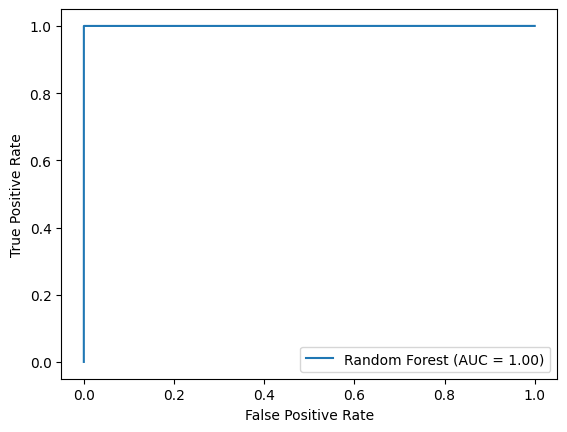

In [170]:
# plotting the ROC curve (Receiver Operating Characteristic)
RF_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
RF_disp.plot()
plt.show()


Test confusion matrix


Text(41.25, 0.5, 'True')

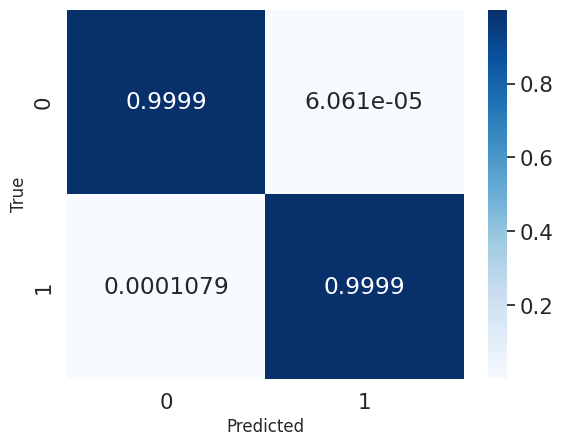

In [175]:
y_pred = loaded_model.predict(scaled_X_test)
y_true = y_test
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
print("\nTest confusion matrix")
sns.set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [176]:
print(cf_matrix) 
#    TP   FP
#    FN   TN
#

[[9.99892102e-01 6.06078972e-05]
 [1.07898144e-04 9.99939392e-01]]


In [38]:
# attempt to a multiclass prediction --> attack_type
import pandas as pd
data['attack_cat_nr'] = pd.Categorical(data.attack_cat).codes
attack_cat_nr = data.attack_cat_nr.unique()
attack_cat_nr #numerical counterpart of the attack_cat

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5], dtype=int8)

In [ ]:
data_cleaned2 = data.drop(cols_cat, axis=1)
data_cleaned2.dtypes

In [40]:
data_cleaned2 = data_cleaned2.drop('label', axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned2.drop('attack_cat_nr', axis=1), data_cleaned2['attack_cat_nr'], test_size=0.20, random_state=37)

In [41]:
train_scaler2 = StandardScaler()

scaled2_X_train = train_scaler2.fit_transform(X_train)
scaled2_X_test = train_scaler2.transform(X_test)

In [24]:
clf_multi = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=12, random_state=41)
# n_estimators = the amount of classification trees used in the forest
# criterion = splitting criterion used (standard = Gini, but I prefer entropy)
# max_depth = the maximum depth of the trees
# random_state = randomizer

clf_multi.fit(scaled2_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=20,
                       random_state=41)

In [25]:
clf_multi.score(scaled2_X_train, y_train)

0.8493824525317991

In [26]:
y_pred = clf_multi.predict(scaled2_X_test)
y_true = y_test

In [27]:
print(attack_types)

['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']


In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
print("\nTest confusion matrix")
sns.set(font_scale=0.8)
plt.figure(figsize=(9,8))
sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.2g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()


In [28]:
print(attack_cat_nr)

[6 7 1 2 3 0 4 9 8 5]


In [29]:
attack_types_sorted = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
sns.set(font_scale=0.8)
plt.figure(figsize=(9,8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.2g') # gmt='g' to disable scientific notation
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(attack_types_sorted, rotation=90)
ax.yaxis.set_ticklabels(attack_types_sorted, rotation=0)
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from time import time
# Random search
#--------------
# record the starting time

start = time()

# creating a grid of parameters
param_grid = {
  'bootstrap': [True, False],
  'n_estimators': [15, 20],
  'max_depth': [15, 20],
  'criterion': ['gini', 'entropy']
}

In [43]:
# instantiate the grid search cross validation
rf_gs = GridSearchCV(
  estimator=clf_multi,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  refit=True,
  return_train_score=True, 
  verbose=5
)

In [44]:
# Record the current time 
start = time()
# Fit the selected model
rf_gs.fit(scaled2_X_train, y_train)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(rf_gs.cv_results_['params'])))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=15;, score=(train=0.876, test=0.845) total time=   5.3s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=15;, score=(train=0.879, test=0.848) total time=   4.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=15;, score=(train=0.877, test=0.845) total time=   4.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=15;, score=(train=0.879, test=0.849) total time=   5.4s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=15;, score=(train=0.875, test=0.846) total time=   4.4s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=20;, score=(train=0.877, test=0.848) total time=   6.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=20;, score=(train=0.879, test=0.848) total time=   5.7s
[CV 3/5] END bootstrap=True, criterion=gini

In [49]:
from sklearn.metrics import accuracy_score
y_pred2_grid = rf_gs.predict(scaled2_X_test)
accuracy_grid = accuracy_score(y_test, y_pred2_grid)
print(accuracy_grid)

0.8622489570195013


In [50]:
y_pred_grid_bestModel = rf_gs.best_estimator_.predict(scaled2_X_test)
print("The model with parameters: ", rf_gs.best_estimator_, " \ngives the following accuracy: ", accuracy_score(y_test, y_pred_grid_bestModel))

The model with parameters:  RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=20,
                       random_state=41)  
gives the following accuracy:  0.8622489570195013


In [51]:
import pickle
pickle.dump(rf_gs.best_estimator_, open('/content/drive/MyDrive/UNSWNB15/RF_model_MULTI.pkl', 'wb'))

In [52]:
import pickle
loaded_model = pickle.load(open('/content/drive/MyDrive/UNSWNB15/RF_model_MULTI.pkl', 'rb'))
y_pred_grid_bestModel = loaded_model.predict(scaled2_X_test)

<ipython-input-57-f832a3e0f1d6>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf_matrix = np.around(cf_matrix / cf_matrix.astype(np.float).sum(axis=1), decimals=3)


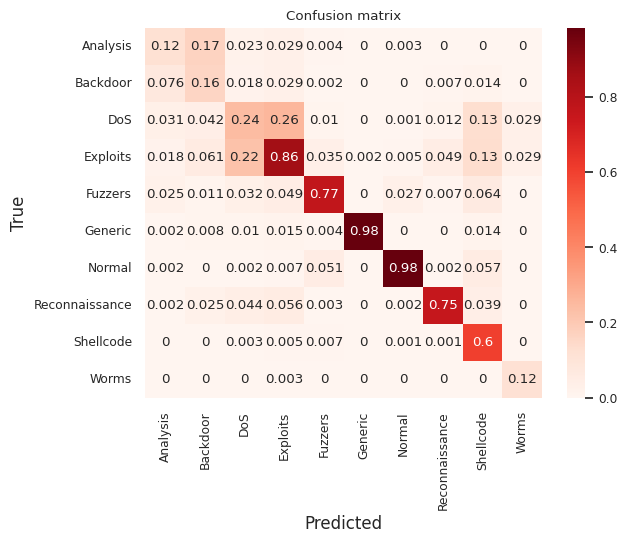

In [57]:
import numpy as np
cf_matrix = confusion_matrix(y_true, y_pred_grid_bestModel)
cf_matrix = np.around(cf_matrix / cf_matrix.astype(np.float).sum(axis=1), decimals=3)
sns.set(font_scale=0.8)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.2g') # fmt='g' to disable scientific notation
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(attack_types_sorted, rotation=90)
ax.yaxis.set_ticklabels(attack_types_sorted, rotation=0)
plt.show()

In [62]:
matthews_corrcoef(y_true, y_pred_grid_bestModel)

0.8220676622908767

In [79]:
CR = classification_report(y_true, y_pred_grid_bestModel, target_names=attack_types_sorted, output_dict=True)
print(CR)

{'Analysis': {'precision': 0.4342105263157895, 'recall': 0.12, 'f1-score': 0.18803418803418803, 'support': 550}, 'Backdoor': {'precision': 0.33482142857142855, 'recall': 0.15889830508474576, 'f1-score': 0.21551724137931033, 'support': 472}, 'DoS': {'precision': 0.4065372829417773, 'recall': 0.24275693809088136, 'f1-score': 0.3039908344472026, 'support': 3279}, 'Exploits': {'precision': 0.6564924545997102, 'recall': 0.8630351939027124, 'f1-score': 0.745726599196165, 'support': 8922}, 'Fuzzers': {'precision': 0.8701721731037692, 'recall': 0.7706573253657532, 'f1-score': 0.8173970057917168, 'support': 4853}, 'Generic': {'precision': 0.9970539814574128, 'recall': 0.9828322514519986, 'f1-score': 0.9898920383672416, 'support': 11708}, 'Normal': {'precision': 0.9617804091557858, 'recall': 0.9815494173500215, 'f1-score': 0.9715643606653673, 'support': 18536}, 'Reconnaissance': {'precision': 0.9047224523612262, 'recall': 0.7531034482758621, 'f1-score': 0.8219796763266841, 'support': 2900}, 'She

In [89]:
precision_scores = precision_score(y_true, y_pred_grid_bestModel, average=None)
recall_scores = recall_score(y_true, y_pred_grid_bestModel, average=None)

In [111]:
import imblearn
print(imblearn.__version__)
print("Shape of X train before smote:", scaled2_X_train.shape)
print("Shape of y train before smote:", y_train.shape)


0.10.1
Shape of X train before smote: (206138, 40)
Shape of y train before smote: (206138,)


In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(scaled2_X_train, y_train.ravel())
print("After oversampling, the shape of X_train: {}", X_resampled.shape)
print("After oversampling, the shape of y_train: {}", y_resampled.shape)

In [116]:
# transform to pandas series so we can use it in our grid search
y_resampled = pd.Series(y_resampled)

In [117]:
y_resampled.rename("attack_cat_nr", inplace=True)
y_resampled.rename_axis("attack_cat_nr")
y_resampled.reindex()
y_resampled.describe()

count    1400.000000
mean        4.500000
std         2.873308
min         0.000000
25%         2.000000
50%         4.500000
75%         7.000000
max         9.000000
Name: attack_cat_nr, dtype: float64

In [120]:
clf_multi = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=4, random_state=41)
from sklearn.model_selection import GridSearchCV
from time import time
# Random search
#--------------
# record the starting time

start = time()

# creating a grid of parameters
param_grid = {
  'bootstrap': [True, False],
  'min_samples_leaf': [2, 4, 6, 8],
  'n_estimators': [12,14,16,18,20],
  'max_depth': [10,15,20,25],
  'max_features': ['Auto', 'sqrt'],
  'criterion': ['gini', 'entropy']
}
# instantiate the grid search cross validation
rf_gs = GridSearchCV(
  estimator=clf_multi,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  refit=True,
  return_train_score=True, 
  verbose=5
)

In [ ]:
# Record the current time 
start = time()
# Fit the selected model
rf_gs.fit(X_resampled, y_resampled)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(rf_gs.cv_results_['params'])))

In [122]:
from sklearn.metrics import accuracy_score
y_pred2_grid = rf_gs.predict(scaled2_X_test)
accuracy_grid = accuracy_score(y_test, y_pred2_grid)
print(accuracy_grid)

0.5019501309789464


In [124]:
y_pred_grid_bestModel_UNDERSAMPLE = rf_gs.best_estimator_.predict(scaled2_X_test)
print("The model with parameters: ", rf_gs.best_estimator_, " \ngives the following accuracy: ", accuracy_score(y_test, y_pred_grid_bestModel_UNDERSAMPLE))

The model with parameters:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=4, n_estimators=12, random_state=41)  
gives the following accuracy:  0.5019501309789464


In [132]:
#!pip install smote-variants
import smote_variants as sv
oversample = sv.MulticlassOversampling(oversampler='polynom_fit_SMOTE_poly', oversampler_params={'random_state':0})

In [ ]:
X_resampled, y_resampled = oversample.sample(scaled2_X_train, y_train.ravel())
print("After oversampling, the shape of X_train: {}", X_resampled.shape)
print("After oversampling, the shape of y_train: {}", y_resampled.shape)

In [137]:
# transform to pandas series so we can use it in our grid search
y_resampled = pd.Series(y_resampled)
y_resampled.rename("attack_cat_nr", inplace=True)
y_resampled.rename_axis("attack_cat_nr")
y_resampled.reindex()
y_resampled.describe()

count    744633.000000
mean          4.500001
std           2.872279
min           0.000000
25%           2.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: attack_cat_nr, dtype: float64

In [139]:
clf_multi = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=4, random_state=41)
from sklearn.model_selection import GridSearchCV
from time import time
# Random search
#--------------
# record the starting time

start = time()

# creating a grid of parameters
param_grid = {
  'bootstrap': [True],
  'n_estimators': [18, 20],
  'max_depth': [15, 20],
  'criterion': ['gini', 'entropy']
}
# instantiate the grid search cross validation
rf_gs = GridSearchCV(
  estimator=clf_multi,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  refit=True,
  return_train_score=True, 
  verbose=5
)

In [140]:
# Record the current time 
start = time()
# Fit the selected model
rf_gs.fit(X_resampled, y_resampled)
# Print the time spend and number of models ran
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(rf_gs.cv_results_['params'])))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=18;, score=(train=0.994, test=0.731) total time= 1.3min
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=18;, score=(train=0.960, test=0.941) total time= 1.2min
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=18;, score=(train=0.955, test=0.986) total time= 1.2min
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=18;, score=(train=0.953, test=0.995) total time= 1.2min
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=18;, score=(train=0.952, test=0.995) total time= 1.1min
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=20;, score=(train=0.994, test=0.730) total time= 1.4min
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=15, n_estimators=20;, score=(train=0.960, test=0.941) total time= 1.4min
[CV 3/5] END bootstrap=True, criterion=gini,

In [141]:
y_pred2_grid_OS = rf_gs.predict(scaled2_X_test)
accuracy_grid_OS = accuracy_score(y_test, y_pred2_grid_OS)
print(accuracy_grid_OS)

y_pred_grid_bestModel_OS = rf_gs.best_estimator_.predict(scaled2_X_test)
print("The model with parameters: ", rf_gs.best_estimator_, " \ngives the following accuracy: ", accuracy_score(y_test, y_pred_grid_bestModel_OS))

0.855923159018143
The model with parameters:  RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=20,
                       random_state=41)  
gives the following accuracy:  0.855923159018143


In [142]:
pickle.dump(rf_gs.best_estimator_, open('/content/drive/MyDrive/UNSWNB15/RF_model_oversample_multiclass.pkl', 'wb'))

In [143]:
matthews_corrcoef(y_true, y_pred_grid_bestModel_OS)

0.8136561131991593

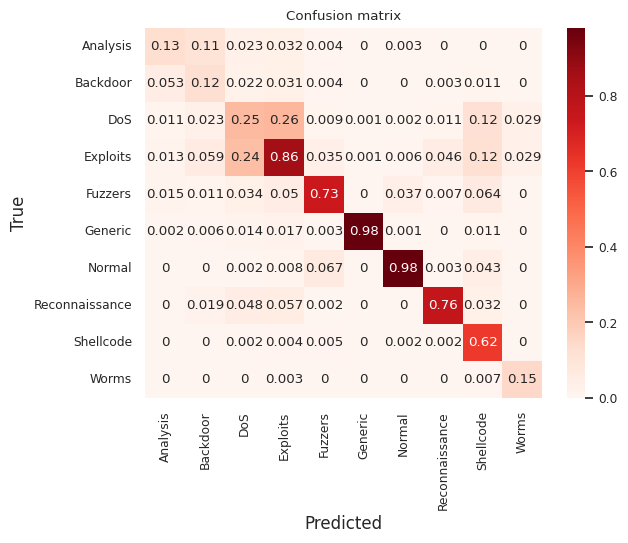

In [145]:
cf_matrix_OS = confusion_matrix(y_true, y_pred_grid_bestModel_OS)
cf_matrix_OS = np.around(cf_matrix_OS / cf_matrix_OS.astype(np.float).sum(axis=1), decimals=3)
sns.set(font_scale=0.8)
ax = sns.heatmap(cf_matrix_OS, annot=True, cmap='Reds', fmt='.2g') # fmt='g' to disable scientific notation
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(attack_types_sorted, rotation=90)
ax.yaxis.set_ticklabels(attack_types_sorted, rotation=0)
plt.show()

In [147]:
print(classification_report(y_true, y_pred_grid_bestModel_OS, target_names=attack_types_sorted))

                precision    recall  f1-score   support

      Analysis       0.58      0.13      0.21       550
      Backdoor       0.35      0.12      0.18       472
           DoS       0.39      0.25      0.30      3279
      Exploits       0.65      0.86      0.74      8922
       Fuzzers       0.85      0.73      0.79      4853
       Generic       1.00      0.98      0.99     11708
        Normal       0.95      0.98      0.96     18536
Reconnaissance       0.91      0.76      0.83      2900
     Shellcode       0.60      0.62      0.61       281
         Worms       0.71      0.15      0.24        34

      accuracy                           0.86     51535
     macro avg       0.70      0.56      0.59     51535
  weighted avg       0.85      0.86      0.85     51535

